# Example 1: Detecting an obvious outlier

In [1]:
import numpy as np
from isotree import IsolationForest

### Random data from a standard normal distribution
np.random.seed(1)
n = 100
m = 2
X = np.random.normal(size = (n, m))

### Will now add obvious outlier point (3, 3) to the data
X = np.r_[X, np.array([3, 3]).reshape((1, m))]

### Fit a small isolation forest model
iso = IsolationForest(ntrees = 10, ndim = 2, nthreads = 1)
iso.fit(X)

### Check which row has the highest outlier score
pred = iso.predict(X)
print("Point with highest outlier score: ",
      X[np.argsort(-pred)[0], ])

Point with highest outlier score:  [3. 3.]


# Example 2: Plotting outlier and density regions

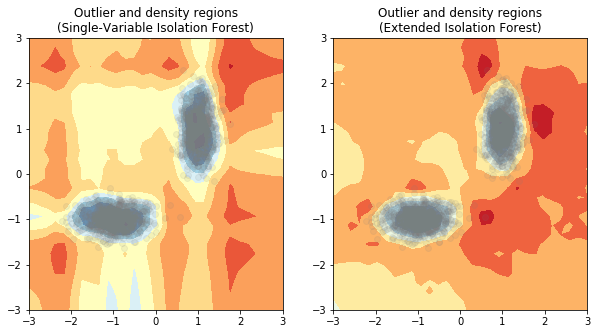

In [2]:
import numpy as np, pandas as pd
from isotree import IsolationForest
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 5

np.random.seed(1)
group1 = pd.DataFrame({
    "x" : np.random.normal(loc=-1, scale=.4, size = 1000),
    "y" : np.random.normal(loc=-1, scale=.2, size = 1000),
})
group2 = pd.DataFrame({
    "x" : np.random.normal(loc=+1, scale=.2, size = 1000),
    "y" : np.random.normal(loc=+1, scale=.4, size = 1000),
})
X = pd.concat([group1, group2], ignore_index=True)

iso_simple = IsolationForest(ndim=1, ntrees=100, new_categ_action="weighted")
iso_simple.fit(X)

iso_ext = IsolationForest(ndim=2, ntrees=100)
iso_ext.fit(X)

pts = np.linspace(-3, 3, 30)
space = np.array( np.meshgrid(pts, pts) ).reshape((2, -1)).T
Z_sim = iso_simple.predict(space)
Z_ext = iso_ext.predict(space)

xx, yy = np.meshgrid(pts, pts)
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_sim.reshape((30, 30)), cmap = 'RdYlBu_r')
plt.scatter(X.x, X.y, c='gray', alpha=.1)
plt.title("Outlier and density regions\n(Single-Variable Isolation Forest)")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_ext.reshape((30, 30)), cmap = 'RdYlBu_r')
plt.scatter(X.x, X.y, c='gray', alpha=.1)
plt.title("Outlier and density regions\n(Extended Isolation Forest)")
plt.show()

# Example 3: calculating pairwise distances

In [3]:
import numpy as np, pandas as pd
from isotree import IsolationForest
from scipy.spatial.distance import cdist

### Generate random multivariate-normal data
np.random.seed(1)
n = 1000
m = 10

### This is a random PSD matrix to use as covariance
S = np.random.normal(size = (m, m))
S = S.T.dot(S)

mu = np.random.normal(size = m, scale = 2)
X = np.random.multivariate_normal(mu, S, n)

### Fitting the model
iso = IsolationForest(prob_pick_avg_gain=0, prob_pick_pooled_gain=0)
iso.fit(X)

### Calculate approximate distance
D_sep = iso.predict_distance(X, square_mat = True)

### Compare against other distances
D_euc = cdist(X, X, metric = "euclidean")
D_cos = cdist(X, X, metric = "cosine")
D_mah = cdist(X, X, metric = "mahalanobis")

### Correlations
print("Correlations between different distance metrics")
pd.DataFrame(
    np.corrcoef([D_sep.reshape(-1), D_euc.reshape(-1), D_cos.reshape(-1), D_mah.reshape(-1)]),
    columns = ['SeparaionDepth', 'Euclidean', 'Cosine', 'Mahalanobis'],
    index   = ['SeparaionDepth', 'Euclidean', 'Cosine', 'Mahalanobis']
)

Correlations between different distance metrics


,SeparaionDepth,Euclidean,Cosine,Mahalanobis
SeparaionDepth,1.000000,0.969585,0.705959,0.736215
Euclidean,0.969585,1.000000,0.760075,0.728392
Cosine,0.705959,0.760075,1.000000,0.554319
Mahalanobis,0.736215,0.728392,0.554319,1.000000
